# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БВТ2004 Разномазов Александр
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [1]:
import turtle
import time

def create_l_system(iters, axiom, rules):
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    for _ in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string


def draw_l_system(t, instructions, angle, distance):
    for cmd in instructions:
        if cmd == 'F':
            t.forward(distance)
        elif cmd == '+':
            t.right(angle)
        elif cmd == '-':
            t.left(angle)


def main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0,
        x_offset=0, offset_angle=0, width=450, height=450):

    inst = create_l_system(iterations, axiom, rules)
    t = turtle.Turtle()
    turtle.tracer(1, 0)  
    wn = turtle.Screen()
    wn.setup(width, height)
    t.up()
    t.backward(-x_offset)
    t.left(90)
    t.backward(-y_offset)
    t.left(offset_angle)
    t.down()
    t.speed(30000)
    t.pensize(size)
    draw_l_system(t, inst, angle, length)
    t.hideturtle()
   

In [3]:
#Кривая Коха

angle = 60
axiom = "F"
rules = {"F": "F+F--F+F" }

iterations = int(input("Введите глубину "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=-300, x_offset=500, offset_angle=90, width=1480, height=700)
print("Глубина | Время")
for i in range (5):
    start_time = time.perf_counter()
    main(i+1, axiom, rules, angle, length=8, size=2, y_offset=-300, x_offset=500, offset_angle=90, width=1480, height=700)
    print("   ", i+1, ("  | {:.4f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину 2
Глубина | Время
    1   | 31.1571 ms    
    2   | 38.4323 ms    
    3   | 96.7764 ms    
    4   | 295.1656 ms    
    5   | 846.8119 ms    


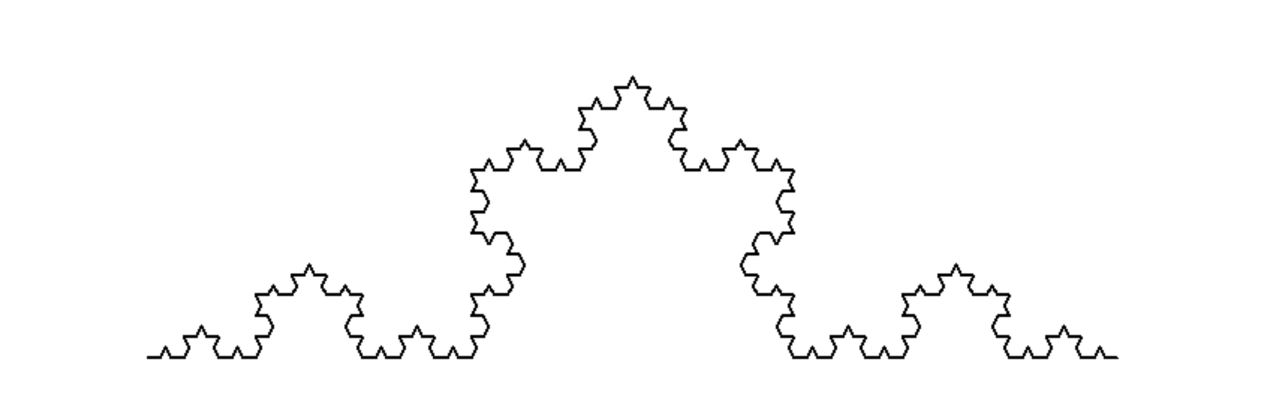

In [4]:
#Кривая Гильберта

axiom = "L"
rules = {"L":"+RF-LFL-FR+", "R":"-LF+RFR+FL-"}
angle = 90
iterations = int(input("Введите глубину "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
print("Глубина | Время")
for i in range (5):
    start_time = time.perf_counter()
    main(i+1, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
    print("   ", i+1, ("  | {:.4f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину 5
Глубина | Время
    1   | 20.1635 ms    
    2   | 33.3411 ms    
    3   | 116.9162 ms    
    4   | 446.8698 ms    
    5   | 1798.1478 ms    


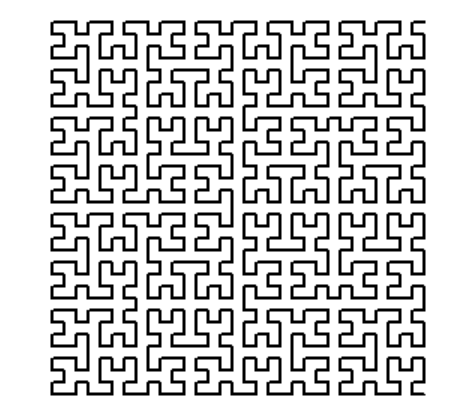

In [2]:
#Кривая Серпинского

axiom = "F+XF+F+XF"
rules = {"X":"XF-F+F-XF+F+XF-F+F-X"}
angle = 90
iterations = int(input("Введите глубину - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
print("Глубина | Время")
for i in range (5):
    start_time = time.perf_counter()
    main(i+1, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=600, height=600)
    print("   ", i+1, ("  | {:.4f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину - 4
Глубина | Время
    1   | 33.6342 ms    
    2   | 156.4941 ms    
    3   | 585.6897 ms    
    4   | 1721.1513 ms    
    5   | 3257.5060 ms    


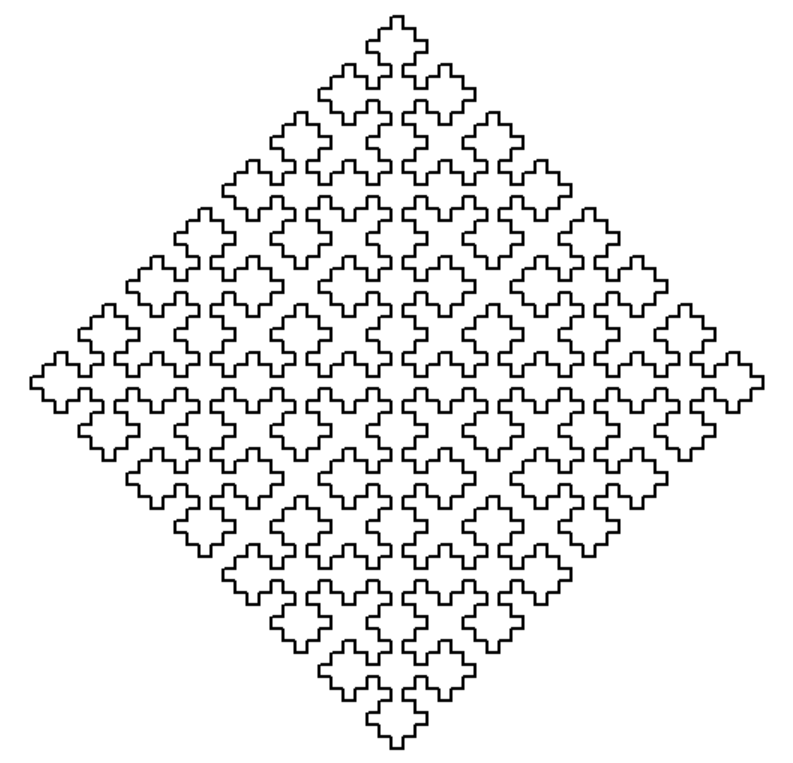

In [3]:
#Салфетка Серпинского

axiom = "FXF--FF--FF"
rules = {"F":"FF", "X":"--FXF++FXF++FXF--"}
angle = 60
iterations = int(input("Введите глубину - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=1200, height=600)
print("Глубина | Время")
for i in range (5):
    start_time = time.perf_counter()
    main(i+1, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=1200, height=600)
    print("   ", i+1, ("  | {:.4f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину - 4
Глубина | Время
    1   | 26.9683 ms    
    2   | 72.7693 ms    
    3   | 289.4872 ms    
    4   | 937.0447 ms    
    5   | 1189.5158 ms    


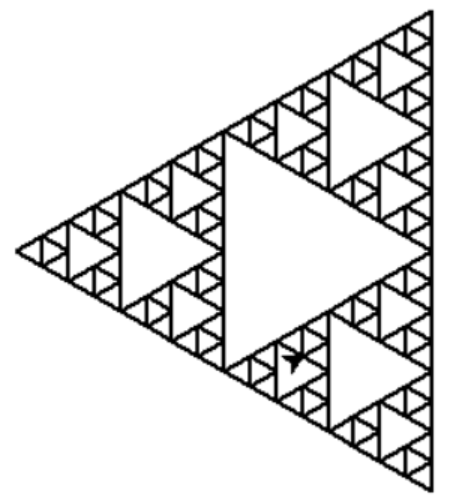

In [10]:
#Ковёр Серпинского

import turtle
import time
def kover(n, m):
    if n == 0:
        turtle.color('black')
        turtle.begin_fill()
        for _ in range(4):
            turtle.forward(m)
            turtle.left(90)
        turtle.end_fill()
 
    else:
        for _ in range(4):
            kover(n - 1, m / 3)
            turtle.forward(m / 3)
 
            kover(n - 1, m / 3)
            turtle.forward(m / 3)
 
            turtle.forward(m / 3)
            turtle.left(90)
 
 
turtle.tracer(100)
turtle.hideturtle()
turtle.speed(300000)
iterations = int(input("Введите глубину - "))
kover(iterations, iterations*100)
it = 1
print("Глубина | Время")
for i in range (4):
    start_time = time.perf_counter()
    kover(it, it*100)
    print("   ", it, ("  | {:.4f} ms    ".format((time.perf_counter() - start_time) * 1000)))
    it+=1

Введите глубину - 2
Глубина | Время
    1   | 3.5682 ms    
    2   | 57.4713 ms    
    3   | 850.5193 ms    
    4   | 27985.4901 ms    


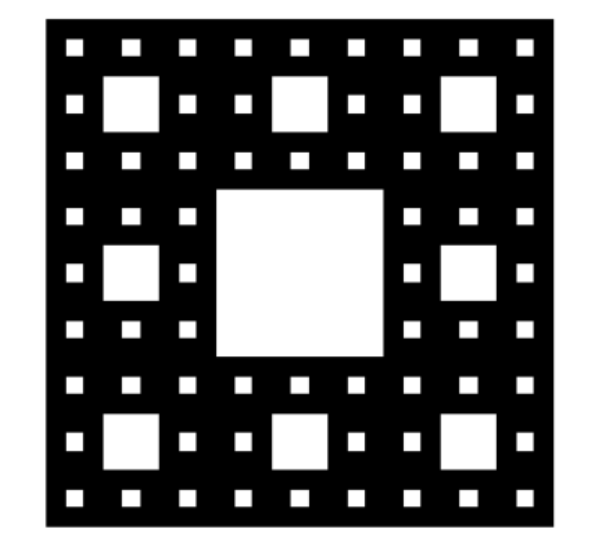

In [2]:
# Дерево Пифагора

from turtle import*
from math import* 
import time
def fractal(aturt, depth, maxdepth):  
    if depth > maxdepth:  
        return 
    length = 180*((sqrt(2)/2)**depth)  
    anotherturt = aturt.clone()  
    aturt.forward(length)  
    aturt.left(45)  
    fractal(aturt, depth+1, maxdepth)  
    anotherturt.right(90)  
    anotherturt.forward(length)  
    anotherturt.left(90)  
    anotherturt.forward(length)  
    if depth != maxdepth:  
        turt3 = anotherturt.clone()  
        turt3.left(45)  
        turt3.forward(180*((sqrt(2)/2)**(1+depth)))  
        turt3.right(90)  
        fractal(turt3, depth+1, maxdepth)  
    anotherturt.left(90)  
    anotherturt.forward(length)  
def draw_fractal(maxdepth):  
    window = Screen()  
    t = Turtle()  
    t.hideturtle()  
    t.penup()  
    t.goto(-75, -225)  
    t.pendown()  
    t.speed(100000)  
    t.left(90)  
    fractal(t, 1, maxdepth)  
    
    
iterations = int(input("Введите глубину - "))
draw_fractal(iterations) 
print("Глубина | Время")
for i in range (5):
    start_time = time.perf_counter()
    draw_fractal(i+1)
    print("   ", i+1, ("  | {:.4f} ms    ".format((time.perf_counter() - start_time) * 1000)))

Введите глубину - 4
Глубина | Время
    1   | 555.1346 ms    
    2   | 896.1744 ms    
    3   | 1591.6514 ms    
    4   | 2982.9702 ms    
    5   | 5766.9418 ms    


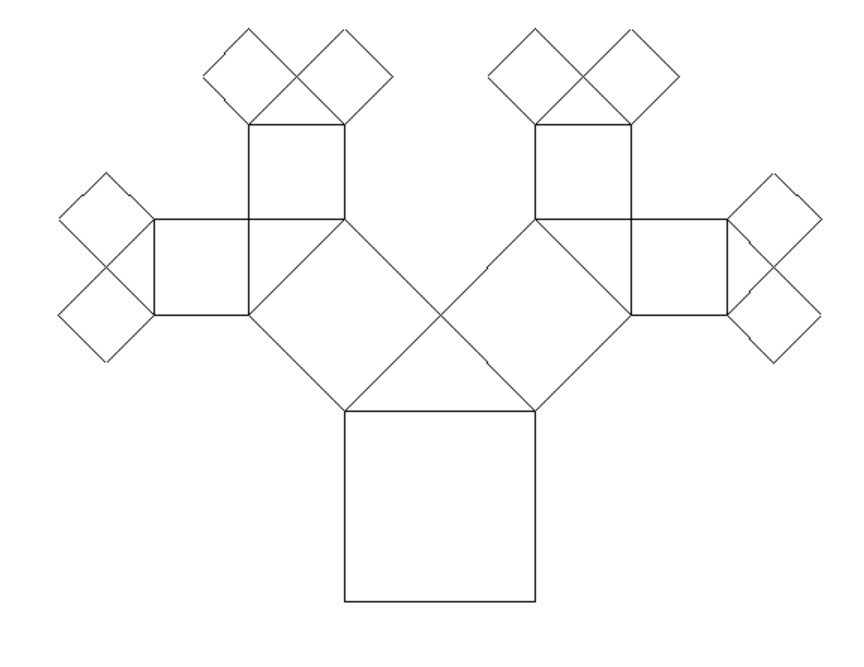

### Вывод